In [13]:
# read dataset from csv
import pandas as pd

dataset = pd.read_csv(filepath_or_buffer='dataset_id-date-title-link.csv', names=['id', 'date', 'title', 'link'])

In [14]:
# for every record take year and add it to the record
dataset['year'] = dataset['date'].apply(lambda x: x.split('-')[0])

In [15]:
# for every record take month and add it to the record
dataset['month'] = dataset['date'].apply(lambda x: x.split('-')[1])

In [16]:
# for every record take day and add it to the record
dataset['day'] = dataset['date'].apply(lambda x: x.split('-')[2])

<Axes: xlabel='year'>

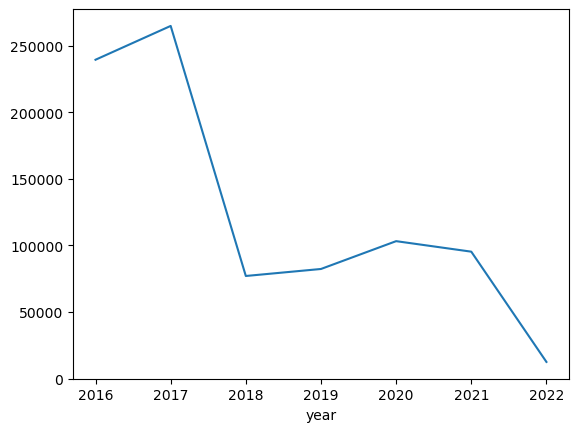

In [17]:
# plot by year
dataset.groupby('year').count()['id'].plot()

<Axes: xlabel='month'>

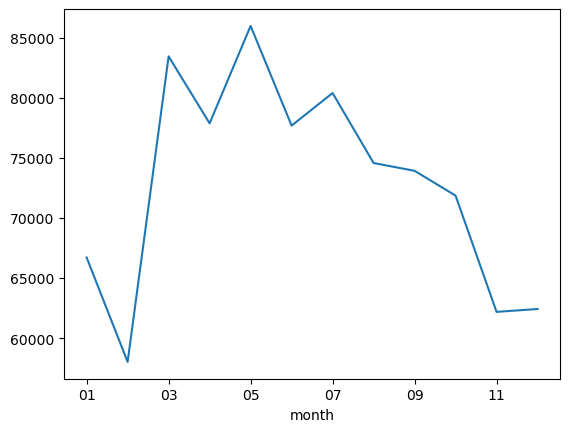

In [18]:
# plot by month
dataset.groupby('month').count()['id'].plot()

<Axes: xlabel='day'>

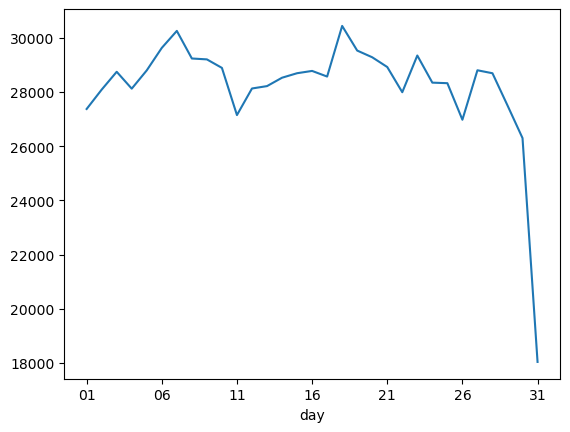

In [19]:
# plot by day
dataset.groupby('day').count()['id'].plot()

In [20]:
# convert to year and month with count
by_year_month = dataset.groupby(by=['year', 'month']).count()['id'].unstack()

/opt/homebrew/Caskroom/miniconda/base/envs/2ch-arch-web-scrapper/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: xlabel='month', ylabel='year'>

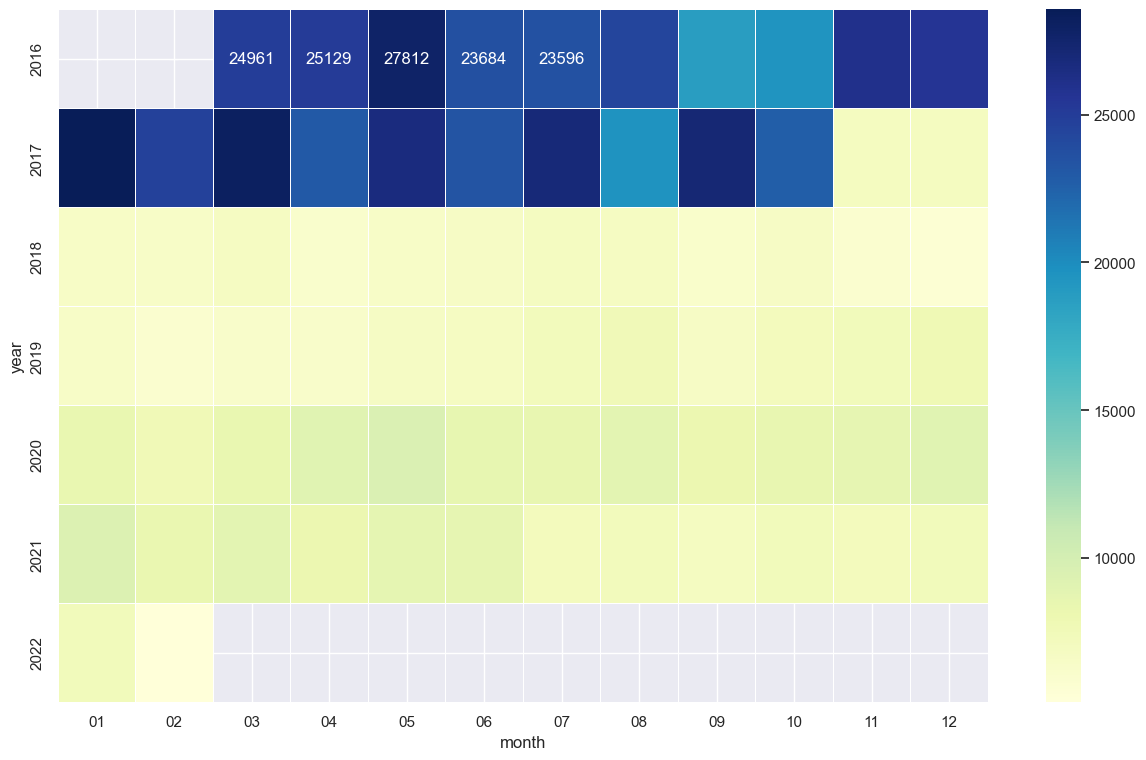

In [26]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc = {'figure.figsize':(15,9)})
sns.heatmap(data=by_year_month, linewidths=.5, annot=True, fmt='.0f', cmap="YlGnBu")

In [28]:
# group by day and count
by_day = dataset.groupby(by=['day']).count()['id'].to_frame()

/opt/homebrew/Caskroom/miniconda/base/envs/2ch-arch-web-scrapper/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/2ch-arch-web-scrapper/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/2ch-arch-web-scrapper/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/2ch-arch-web-scrapper/lib/python3.9/sit

<Axes: xlabel='day', ylabel='id'>

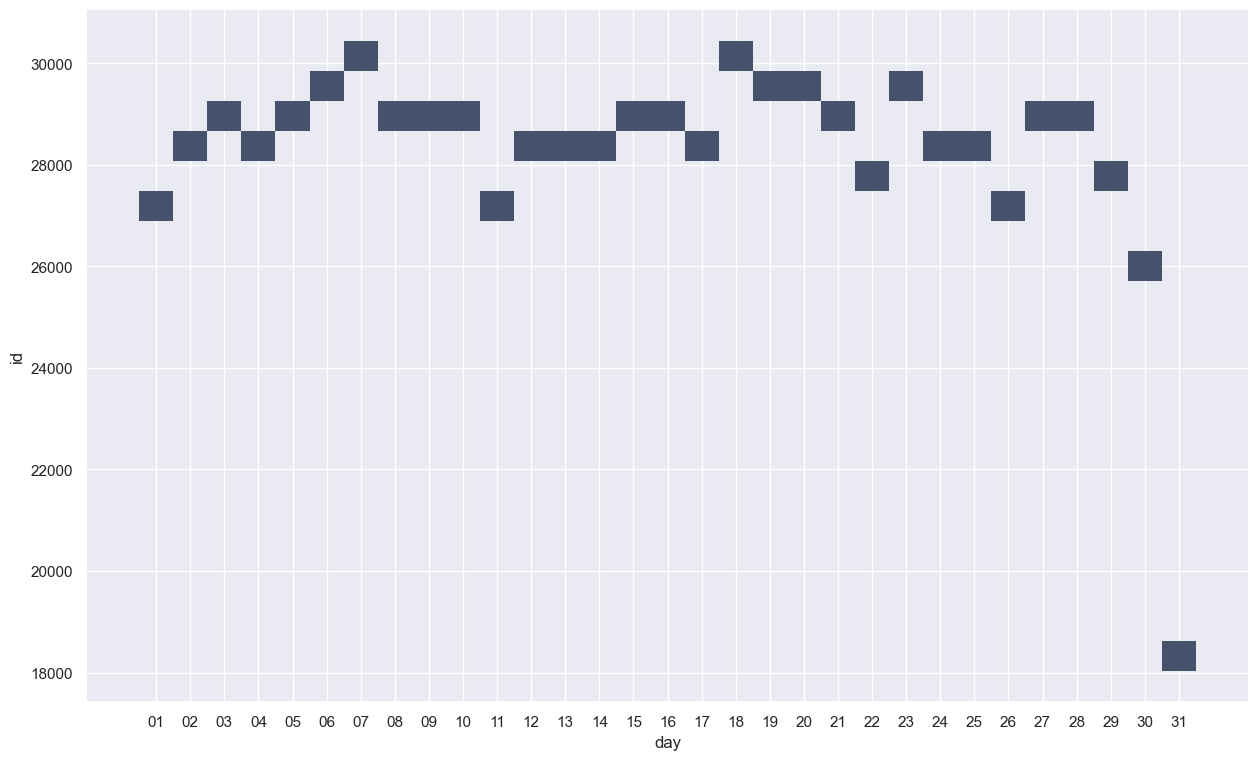

In [23]:
# plot by day
sns.histplot(data=by_day, x='day', y='id')